In [154]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

import numpy as np
import scipy as sp
from scipy.integrate import trapz
from matplotlib import pyplot as plt
import abstractions as abs

plt.close('all')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Problem 1

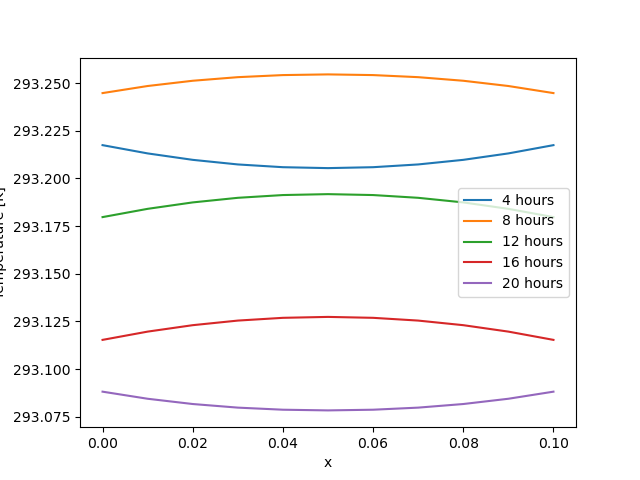

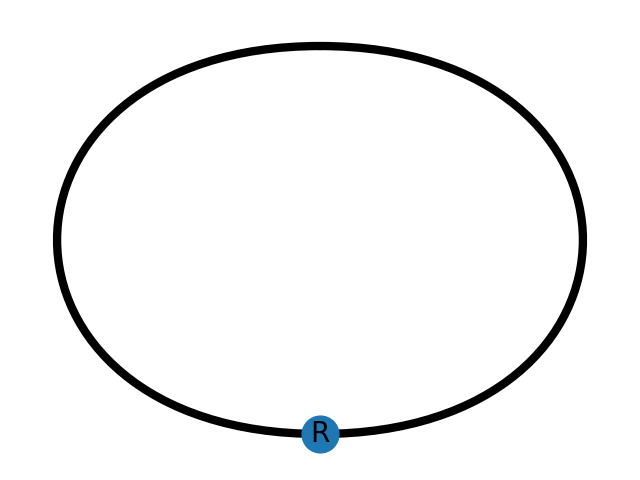

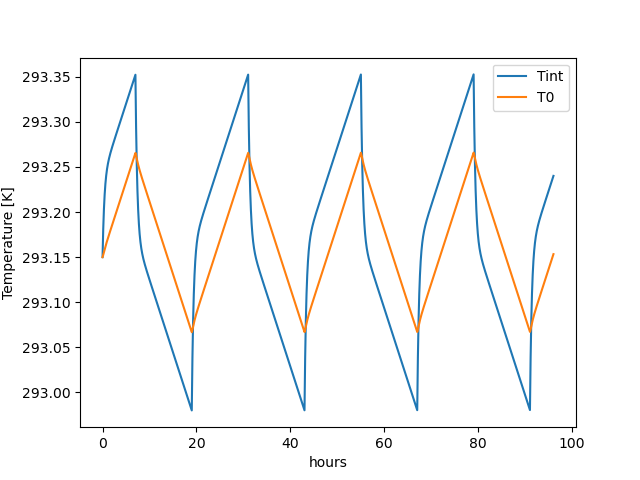

In [157]:
sim_kwargs = {
    "delt": 15,
    "simLength": 96 * 60 * 60,
    "Tout" : 288.15,
    "radG": None,
    "Tfloor": None,
}
wall_kwargs = {}

room_kwargs = {
    "T0": 293.15,
    "V" : 2880, #volume of air
    "Eint" : 250 #internal heat generation
}
vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "HWP1",
    "alphas": None,
    "As": None,
    "Ls": None
}

roomList = [
    ("R", {}), # room
    ]

connectivityMatrix = np.array([
    [3],
])

bG = abs.BuildingGraph(connectivityMatrix, roomList)
bG.updateAllEdges({"wall_kwargs" :wall_kwargs})
bG.updateAllNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs
    })
bG.draw()

build_sim = abs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)

build_sim.run()

Tints = build_sim.bG.G.nodes['R']['Tints']
T_profs = build_sim.bG.G.edges['R', 'R']['T_profs']
wall = build_sim.bG.G.edges['R', 'R']['wall']
h_profs = [4, 8, 12, 16, 20]
h_profs = [h + 48 for h in h_profs]
# h_profs = [0, *h_profs]

# Plotting
plt.figure()
plt.plot(build_sim.hours, Tints, label='Tint')
plt.plot(build_sim.hours, T_profs[0, :], label='T0')
plt.legend()
plt.xlabel('hours')
plt.ylabel('Temperature [K]')

plt.figure()
for h in h_profs:
    i = int(h * 60 * 60 / build_sim.delt)
    plt.plot(wall.x, T_profs[:, i], label=f'{h % 24} hours')

plt.legend()
plt.xlabel('x')
plt.ylabel('Temperature [K]')
plt.show()

### Exterior Walls

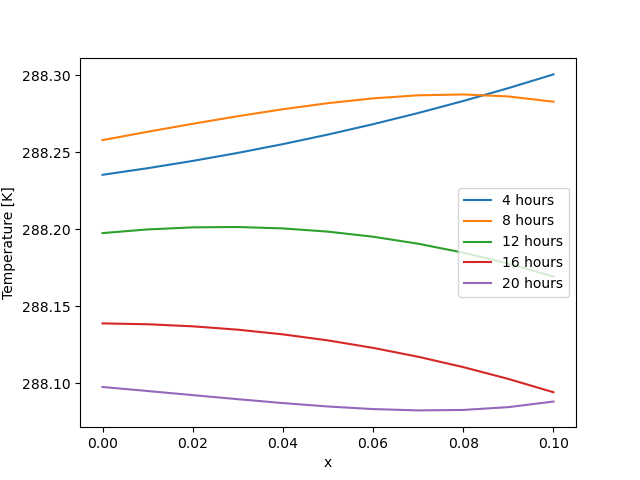

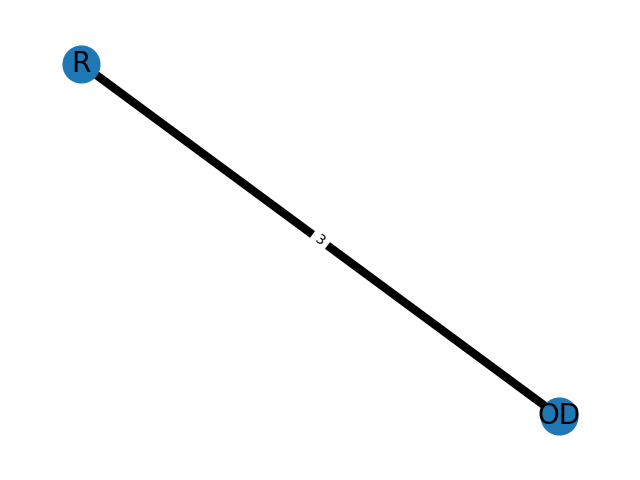

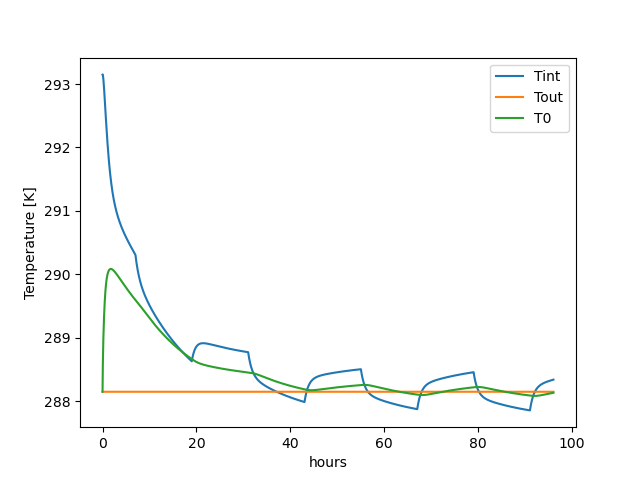

In [158]:
roomListOut = [
    ("R", {}), #room
    ("OD", {}),# outside
    ]

connectivityMatrixOut = np.array([
    [0 , 3],
    [3 , 0],
])

bG = abs.BuildingGraph(connectivityMatrixOut, roomListOut)
bG.updateAllEdges({"wall_kwargs" :wall_kwargs})
bG.updateAllNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs
    })
bG.draw()


build_sim = abs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)

build_sim.run()

Tints = build_sim.bG.G.nodes['R']['Tints']
Touts = build_sim.bG.G.nodes['OD']['Tints']
T_profs = build_sim.bG.G.edges['R', 'OD']['T_profs']
wall = build_sim.bG.G.edges['R', 'OD']['wall']


# Plotting
plt.figure()
plt.plot(build_sim.hours, Tints, label='Tint')
plt.plot(build_sim.hours, Touts, label='Tout')
plt.plot(build_sim.hours, T_profs[0, :], label='T0')
plt.legend()
plt.xlabel('hours')
plt.ylabel('Temperature [K]')

plt.figure()
for h in h_profs:
    i = int(h * 60 * 60 / build_sim.delt)
    plt.plot(wall.x, T_profs[:, i], label=f'{h % 24} hours')

plt.legend()
plt.xlabel('x')
plt.ylabel('Temperature [K]')
plt.show()

## Problem 4

In [159]:
# Window dimmensions
H = 1
W = 1

# Load data
JW = sp.io.loadmat('JulyWeek.mat')
alphas = [42, 42, 42]
As = [1.61, 1.755, 1.755]
Ls = [11.34, 6.62, 2.07]

Q4 = sp.io.loadmat('./Q4data.mat')

Real_Tint = Q4['TintMeas'].flatten() + 273.15

T_start = Real_Tint[0]

hours = Q4['time'].flatten()
times = hours * 60 * 60
Tints[0] = T_start
Touts = Q4['Tout'].flatten() + 273.15

Text(0, 0.5, 'Temperature [K]')

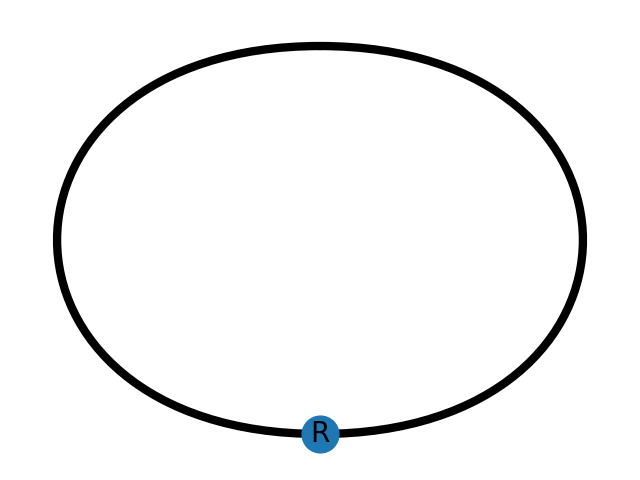

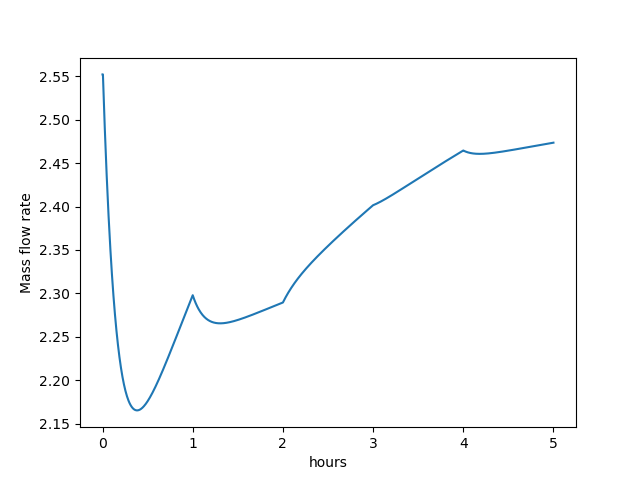

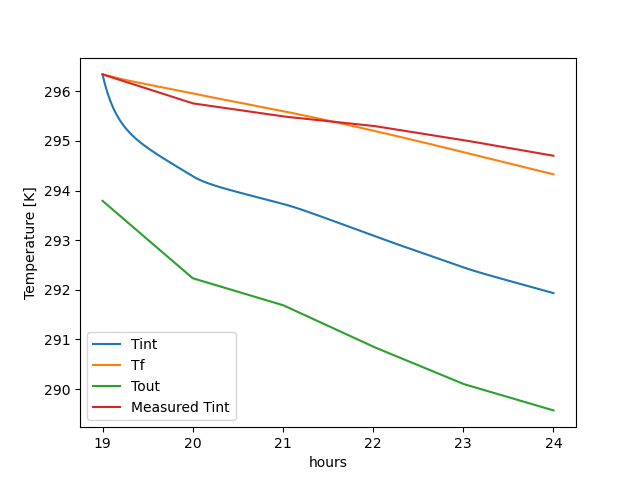

In [160]:
sim_kwargs = {
    "delt": times[1] - times[0],
    "simLength": times[-1] - times[0],
    "Tout" : Touts,
    "radG": None,
    "Tfloor": None,
}
wall_kwargs = {}

room_kwargs = {
    "T0": T_start,
    "V" : 2880, #volume of air
    "Eint" : 250 #internal heat generation
}

vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "HWP4",
    "alphas": alphas,
    "As": As,
    "Ls": Ls,
}

bG = abs.BuildingGraph(connectivityMatrix, roomList)
bG.draw()

bG.updateAllEdges({"wall_kwargs" :wall_kwargs})
bG.updateAllNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs
    })

build_sim = abs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)
build_sim.run()

Tints = build_sim.bG.G.nodes['R']['Tints']
T_profs = build_sim.bG.G.edges['R', 'R']['T_profs']
wall = build_sim.bG.G.edges['R', 'R']['wall']
Vnvs = build_sim.bG.G.nodes['R']['Vnvs']
Vnvs[0] = Vnvs[1]

# Plotting
plt.figure()
plt.plot(build_sim.hours, Vnvs)
plt.xlabel('hours')
plt.ylabel('Mass flow rate')

plt.figure()
plt.plot(hours, Tints, label='Tint')
plt.plot(hours, T_profs[0, :], label='Tf')
plt.plot(hours, Touts, label='Tout')
plt.plot(hours, Real_Tint, label='Measured Tint')
plt.legend()
plt.xlabel('hours')
plt.ylabel('Temperature [K]')

### Exterior Walls

Text(0, 0.5, 'Temperature [K]')

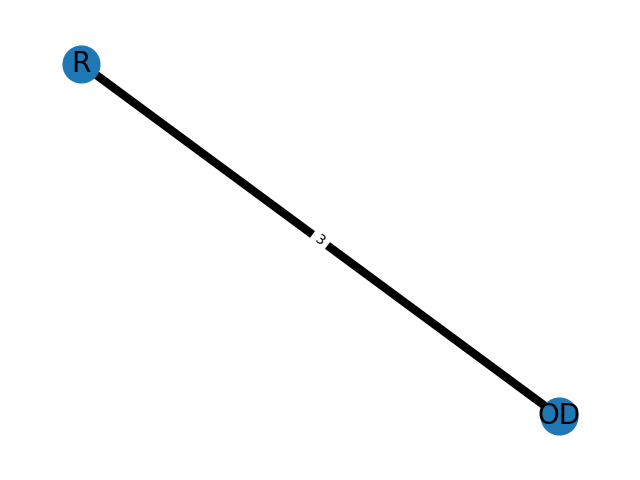

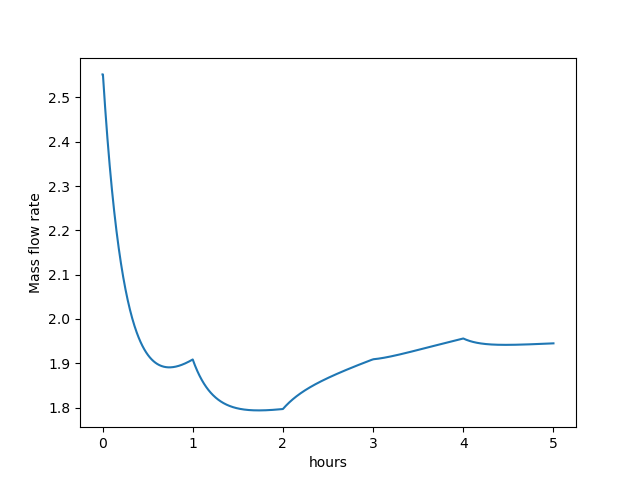

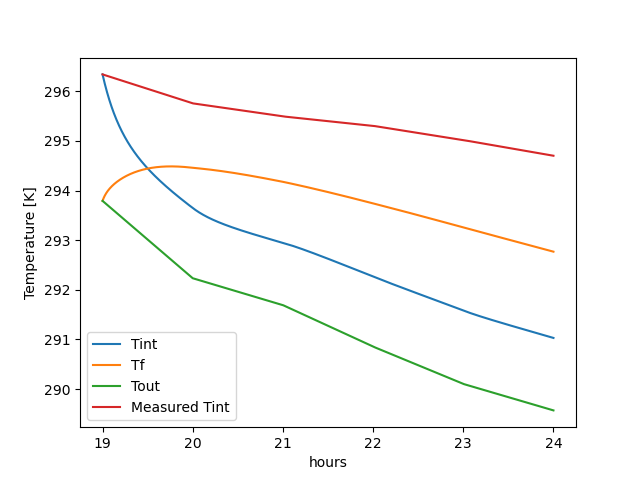

In [161]:
sim_kwargs = {
    "delt": times[1] - times[0],
    "simLength": times[-1] - times[0],
    "Tout" : Touts,
    "radG": None,
    "Tfloor": None,
}
wall_kwargs = {}

room_kwargs = {
    "T0": T_start,
    "V" : 2880, #volume of air
    "Eint" : 250 #internal heat generation
}
vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "HWP4",
    "alphas": alphas,
    "As": As,
    "Ls": Ls,
}

bG = abs.BuildingGraph(connectivityMatrixOut, roomListOut)
bG.draw()

bG.updateAllEdges({"wall_kwargs" :wall_kwargs})
bG.updateAllNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs
    })

build_sim = abs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)
build_sim.run()

Tints = build_sim.bG.G.nodes['R']['Tints']
T_profs = build_sim.bG.G.edges['R', 'OD']['T_profs']
wall = build_sim.bG.G.edges['R', 'OD']['wall']
Vnvs = build_sim.bG.G.nodes['R']['Vnvs']
Vnvs[0] = Vnvs[1]

# Plotting
plt.figure()
plt.plot(build_sim.hours, Vnvs)
plt.xlabel('hours')
plt.ylabel('Mass flow rate')

plt.figure()
plt.plot(hours, Tints, label='Tint')
plt.plot(hours, T_profs[0, :], label='Tf')
plt.plot(hours, Touts, label='Tout')
plt.plot(hours, Real_Tint, label='Measured Tint')
plt.legend()
plt.xlabel('hours')
plt.ylabel('Temperature [K]')

## My Building

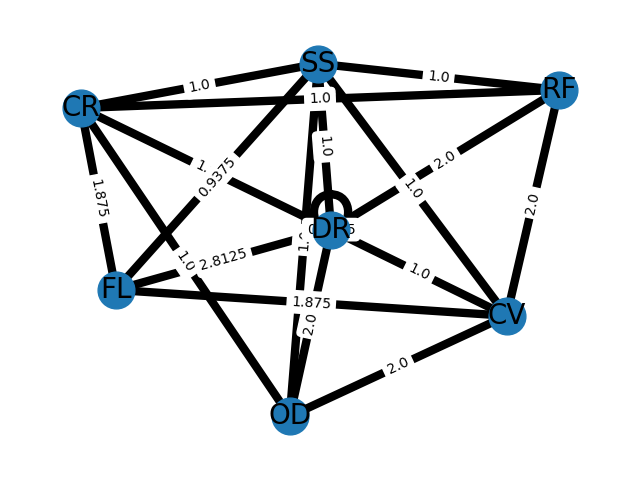

In [146]:
wW = 1- .25**2 #window-wall area
dW = 1 - .25*.75 #door-wall area
roomList = [
    ("CR", {}), 
    ("SS", {}), 
    ("DR", {}), 
    ("CV", {}), 
    ("FL", {}),
    ("RF", {}),
    ("OD", {}),
    ]

connectivityMatrix = np.array([
    [0, 1, 1, 0, 2*wW, 1, 1],
    [1, 0, 1 ,1, wW, 1, 1],
    [1, 1, dW, 1, 3*wW, 2, 2],
    [0, 1, 1, 0, 2*wW, 2, 2],
])

bG = abs.BuildingGraph(connectivityMatrix, roomList)
bG.draw()

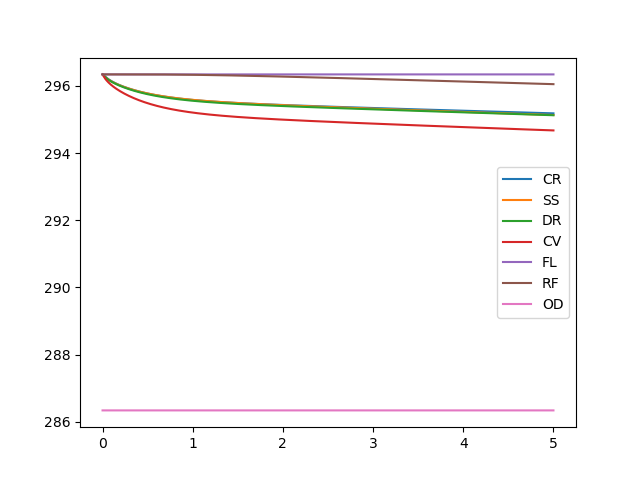

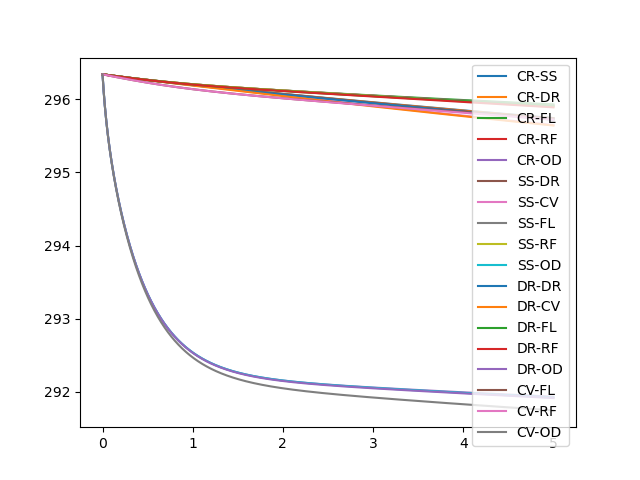

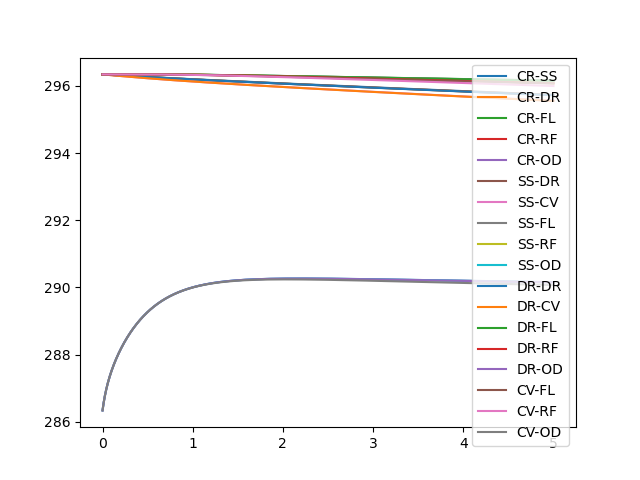

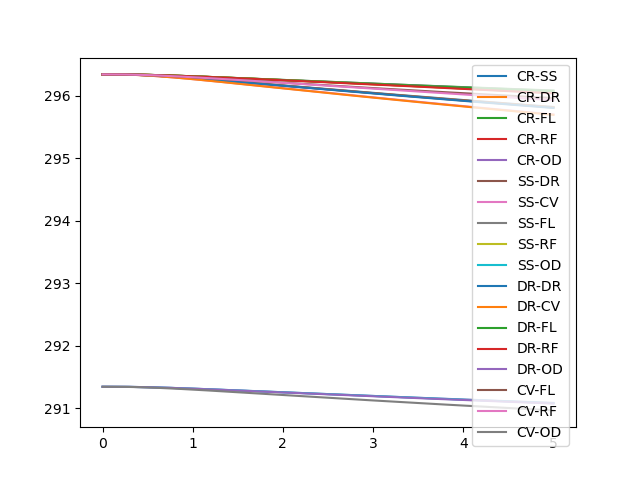

In [147]:
sim_kwargs = {
    "delt": times[1] - times[0],
    "simLength": times[-1] - times[0],
    "Tout" : T_start - 10,
    "radG": None,
    "Tfloor": T_start,
}
wall_kwargs = {}

room_kwargs = {
    "T0": T_start,
    "V" : 4**2 * 3, #volume of air
    "Eint" : 0 #internal heat generation
}
vent_kwargs = {
    'H': 1,
    'W' : 1,
    "ventType": "None",
    "alphas": alphas,
    "As": As,
    "Ls": Ls,
}

bG.updateAllEdges({"wall_kwargs" :wall_kwargs})
bG.updateAllNodes({
    "room_kwargs": room_kwargs,
    "vent_kwargs": vent_kwargs
    })

for r in ["CR", "DR"]:
    bG.G.nodes[r]["room_kwargs"]["V"] *= 2

build_sim = abs.BuildingSimulation(**sim_kwargs)
build_sim.initialize(bG)
build_sim.run()
plt.figure()
for n, d in build_sim.bG.G.nodes(data=True):
    plt.plot(build_sim.hours, d['Tints'], label=n)
plt.legend()

plt.figure()
for i, j, d in build_sim.bG.G.edges(data=True):
    plt.plot(build_sim.hours, d['T_profs'][0, :], label=f'{i}-{j}')
plt.legend()

plt.figure()
for i, j, d in build_sim.bG.G.edges(data=True):
    plt.plot(build_sim.hours, d['T_profs'][-1, :], label=f'{i}-{j}')
plt.legend()

plt.figure()
for i, j, d in build_sim.bG.G.edges(data=True):
    center = int(len(d['T_profs'][:, 0]) / 2)
    plt.plot(build_sim.hours, d['T_profs'][center, :], label=f'{i}-{j}')
plt.legend()

['CR', 'SS', 'DR', 'CV']

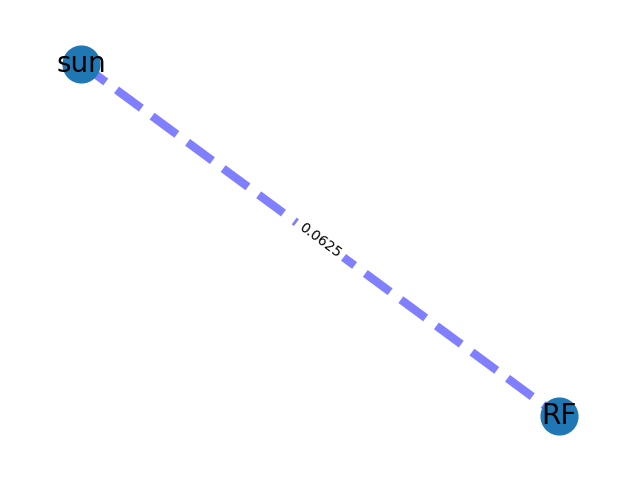

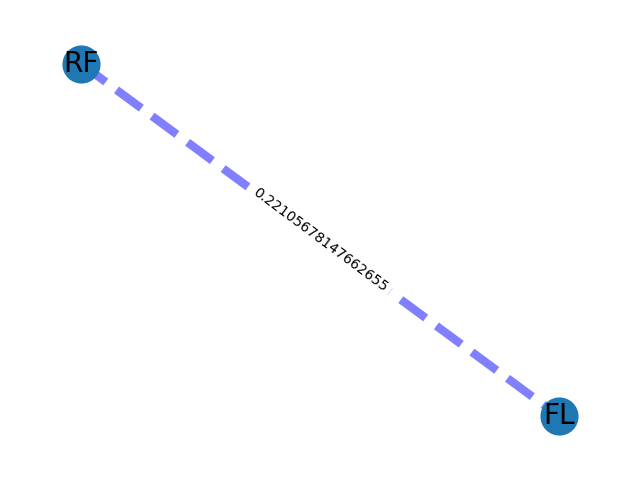

In [138]:
n = connectivityMatrix.shape[0]
interiorRooms = roomList[:n]
interiorRooms = [r[0] for r in interiorRooms]
radKwargs = {
    "solveRooms": interiorRooms,
}
display(interiorRooms)
foo = abs.Radiation(**radKwargs)
foo.initialize("RF")
foo.bG.draw()

foo = abs.Radiation(**radKwargs)
foo.initialize("CR")
foo.bG.draw()

In [127]:
for n in foo.bG.G.nodes:
    print(n)

RF
FL


[autoreload of abstractions failed: Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pycascade/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pycascade/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/opt/homebrew/Caskroom/miniconda/base/envs/pycascade/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 879, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1017, in get_code
  File "<frozen importlib._bootstrap_external>", line 947, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/nicholasbachand/Documents/Resea

In [149]:
build_sim.bG.G.edges['RF', 'CR']["front"]

'CR'

In [132]:
fooNode = build_sim.bG.G["CR"]
fooNode['SS']['wall']

{'weight': 1.0,
 'wall_kwargs': {},
 'wall': <abstractions.WallSimulation at 0x16165d930>,
 'T_profs': array([[296.34199735, 296.34199735, 296.3417572 , ..., 295.74480348,
         295.74436932, 295.74393523],
        [296.34199735, 296.34199735, 296.34198169, ..., 295.77286603,
         295.77242606, 295.77198617],
        [296.34199735, 296.34199735, 296.34199735, ..., 295.79461926,
         295.79417449, 295.79372979],
        ...,
        [296.34199735, 296.34199735, 296.34199735, ..., 295.78947475,
         295.78902248, 295.78857029],
        [296.34199735, 296.34199735, 296.34196602, ..., 295.76583916,
         295.76538921, 295.76493932],
        [296.34199735, 296.34199735, 296.34151705, ..., 295.73575364,
         295.735307  , 295.73486042]])}